In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [151]:
data = pd.read_csv(r'C:\Users\Marek\loan_data_set.csv', delimiter=',')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [152]:
data.isnull().values.any()

True

In [153]:
data.shape

(614, 13)

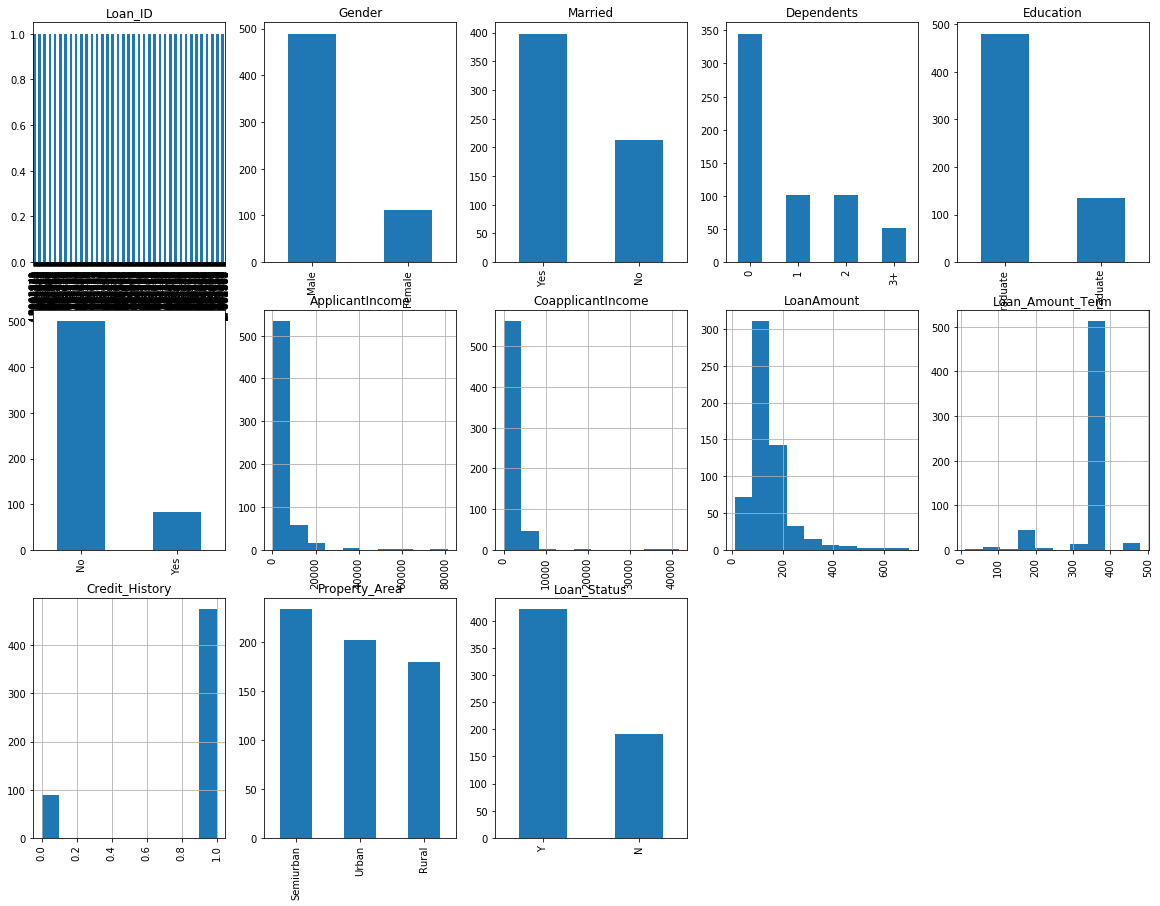

In [154]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(data.shape[1])/cols)

for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind='bar',axes=ax)
        
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation = 'vertical')
#plt.subplot_adjust(hspace = 0.7, wspace = 0.5)

In [155]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [157]:
data = data.drop(['Loan_ID','Gender'],axis=1)
data


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [158]:
data.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [159]:
data.fillna(method='ffill',inplace=True)
data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [160]:
data_dummies = pd.get_dummies(data,columns=['Married','Education', 'Self_Employed','Property_Area'])

In [161]:
data = data_dummies
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,NaN,360.0,1.0,Y,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,N,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,1,0,1,0,0,0,1
5,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,1,0,0,1,0,0,1
6,0,2333,1516.0,95.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1
7,3+,3036,2504.0,158.0,360.0,0.0,N,0,1,1,0,1,0,0,1,0
8,2,4006,1526.0,168.0,360.0,1.0,Y,0,1,1,0,1,0,0,0,1
9,1,12841,10968.0,349.0,360.0,1.0,N,0,1,1,0,1,0,0,1,0


In [162]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [163]:
data["isYes"]=np.where(data['Loan_Status']=="Y",1,0)
data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,isYes
0,0,5849,0.0,NaN,360.0,1.0,Y,1,0,1,0,1,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,N,0,1,1,0,1,0,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,0,1,1,0,0,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,1,0,1,0,0,0,1,1
5,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,1,0,0,1,0,0,1,1
6,0,2333,1516.0,95.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,1
7,3+,3036,2504.0,158.0,360.0,0.0,N,0,1,1,0,1,0,0,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,1
9,1,12841,10968.0,349.0,360.0,1.0,N,0,1,1,0,1,0,0,1,0,0


In [164]:
data = data.join(pd.get_dummies(data.Dependents, prefix='Dependents'))
data.drop(columns= ['Dependents', 'Dependents_3+'], inplace=True)
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,isYes,Dependents_0,Dependents_1,Dependents_2
0,5849,0.0,NaN,360.0,1.0,Y,1,0,1,0,1,0,0,0,1,1,1,0,0
1,4583,1508.0,128.0,360.0,1.0,N,0,1,1,0,1,0,1,0,0,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,1,0,0,1,0,0,1,1,1,0,0
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,1,1,0,0
4,6000,0.0,141.0,360.0,1.0,Y,1,0,1,0,1,0,0,0,1,1,1,0,0
5,5417,4196.0,267.0,360.0,1.0,Y,0,1,1,0,0,1,0,0,1,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,1,1,0,0
7,3036,2504.0,158.0,360.0,0.0,N,0,1,1,0,1,0,0,1,0,0,0,0,0
8,4006,1526.0,168.0,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,1,0,0,1
9,12841,10968.0,349.0,360.0,1.0,N,0,1,1,0,1,0,0,1,0,0,0,1,0


In [165]:
data = data.drop(['Loan_Status'],axis=1)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 613 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
isYes                      614 non-null int32
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
dtypes: float64(4), int32(1), int64(1), uint8(12)
memory us

In [189]:
data.isnull().values.any()
data.isna().any
data = data.drop(['ApplicantIncome'], axis=1)
data = data.dropna()

In [190]:
X = data
y = data["isYes"]

In [191]:
y.mean()

0.6867862969004894

In [192]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2,random_state=1)

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [194]:
model = LogisticRegression()

In [195]:
model.fit(X, y)

C:\Users\Marek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
model.intercept_

array([-0.6584846])

In [197]:
model.coef_

array([[-3.58583070e-05, -1.56190215e-03, -4.11331207e-03,
         9.04208649e-01, -4.49436421e-01, -1.85039286e-01,
        -2.38058123e-01, -3.96417584e-01, -5.53256802e-01,
        -8.12189050e-02, -2.60202423e-01, -9.17082791e-02,
        -2.82565005e-01,  7.00087871e+00, -1.83635759e-01,
        -3.76719417e-01,  9.78263499e-02]])

In [198]:
model.predict_proba(X)

array([[0.95698925, 0.04301075],
       [0.00908317, 0.99091683],
       [0.01997858, 0.98002142],
       ...,
       [0.02351308, 0.97648692],
       [0.01322097, 0.98677903],
       [0.9674242 , 0.0325758 ]])

In [200]:
from sklearn.metrics import accuracy_score

In [201]:
accuracy_score(model.predict(X), y)

1.0

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [203]:
X_train.shape

(410, 17)

In [204]:
X_test.shape

(203, 17)

In [205]:
203/(410+203)

0.33115823817292006

In [206]:
model.fit(X_train, y_train)

C:\Users\Marek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [207]:
y_pred = model.predict(X_test)

In [208]:
accuracy_score(y_pred, y_test)

1.0

In [209]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_pred, y_test))

C:\Users\Marek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Marek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


C:\Users\Marek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Marek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

NameError: name 'prob' is not defined

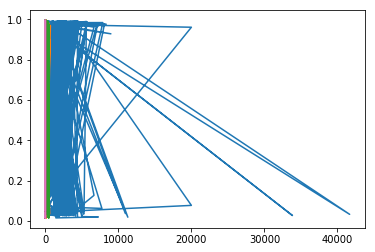

In [213]:
plt.plot(X, 1/(1+np.exp(-model.intercept_ - np.dot(X, model.coef_.T))))
plt.plot(X, prob)
plt.scatter(X,y)
plt.show()